# largeVis

### Install
```bash
sudo python setup.py install
```

### Run
```bash
python LargeVis_run.py -input -output
```

* `-input`: Input file of feature vectors or networks.
* `-output`: Output file of low-dimensional representations.

Besides the two parameters, other optional parameters include:
* `-fea`: specify whether the input file is high-dimensional feature vectors (1) or networks (0). Default is 1. 
* `-threads`: Number of threads. Default is 8.
* `-outdim`: The lower dimensionality LargesVis learns for visualization (usually 2 or 3). Default is 2.
* `-samples`: Number of edge samples for graph layout (in millions). Default is set to ```data size / 100``` (million). 
* `-prop`: Number of times for neighbor propagations in the state of K-NNG construction, usually less than 3. Default is 3.
* `-alpha`: Initial learning rate. Default is 1.0.
* `-trees`: Number of random-projection trees used for constructing K-NNG. 50 is sufficient for most cases unless you are dealing with very large datasets (e.g. data size over 5 million), and less trees are suitable for smaller datasets. Default is set according to the data size.
* `-neg`: Number of negative samples used for negative sampling. Default is 5.
* `-neigh`: Number of neighbors (K) in K-NNG, which is usually set as three times of perplexity. Default is 150.
* `-gamma`: The weights assigned to negative edges. Default is 7.
* `-perp`: The perplexity used for deciding edge weights in K-NNG. Default is 50.


#### Example
```bash
python LargeVis_run.py -input mnist_vec784D.txt -output mnist_vec2D.txt
python LargeVis_run.py -input mnist_vec784D.txt -output mnist_vec3D.txt -outdim 3

```

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_label_file = 'mnist_label.txt'
data_vec2D_file = 'mnist_vec2D.txt'
data_vec3D_file = 'mnist_vec3D.txt'

In [3]:
def loadLabel(file):
    return [line.strip() for line in open(file)]

In [4]:
def load2D(file, label, n=np.Inf):
    N = M = 0
    data = {}
    for i, line in enumerate(open(file)):
        vec = line.strip().split(' ')
        if i == 0:
            N = int(vec[0])
            M = int(vec[1])
        elif i <= np.minimum(N, n):
            data.setdefault(label[i-1], []).append((float(vec[-2]), float(vec[-1])))
    return data

In [5]:
def load3D(file, label, n=np.Inf):
    N = M = 0
    data = {}
    for i, line in enumerate(open(file)):
        vec = line.strip().split(' ')
        if i == 0:
            N = int(vec[0])
            M = int(vec[1])
        elif i <= np.minimum(N, n):
            data.setdefault(label[i-1], []).append((float(vec[-3]), float(vec[-2]), float(vec[-1])))
    return data

In [6]:
def plot(data, legend, dim=2):
    fig = plt.figure(figsize = (9,9))
    
    if dim == 2:
        ax = plt.axes()
        for ll in sorted(data.keys()):
            x = [t[0] for t in data[ll]]
            y = [t[1] for t in data[ll]]
            ax.scatter(x, y, s=5)

    elif dim == 3:
        ax = plt.axes(projection='3d')
        for ll in sorted(data.keys()):
            x = [t[0] for t in data[ll]]
            y = [t[1] for t in data[ll]]
            z = [t[2] for t in data[ll]]
            ax.scatter(x, y, z, s=5)
    
    ax.legend(legend)

In [7]:
data_label = loadLabel(data_label_file)
data_vec2D = load2D(data_vec2D_file, data_label, 7000)
data_vec3D = load3D(data_vec3D_file, data_label, 7000)

legend = np.unique(data_label)

<IPython.core.display.Javascript object>


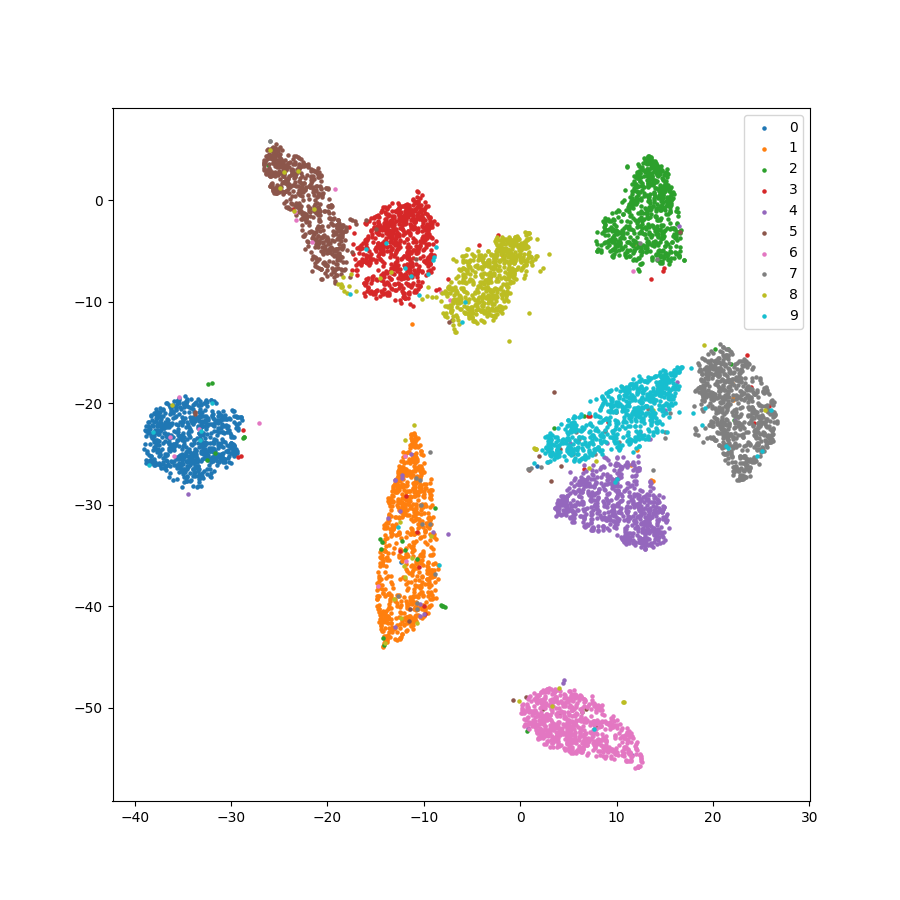

<IPython.core.display.Javascript object>


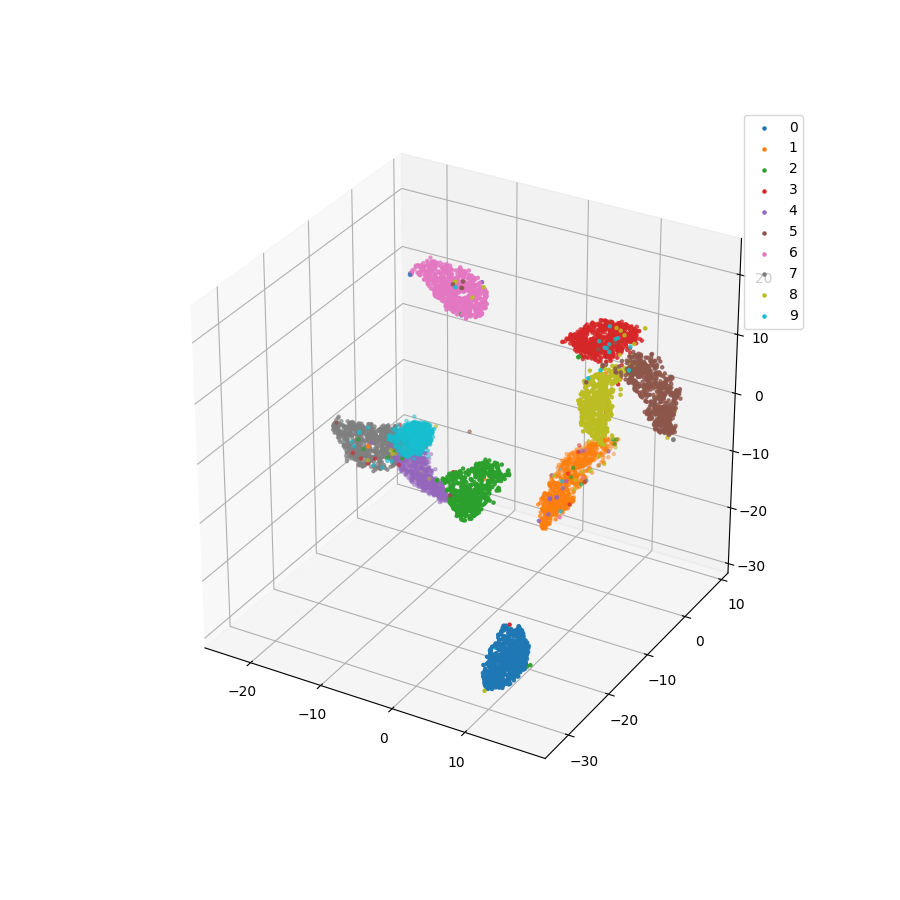

In [8]:
%matplotlib notebook

plot(data_vec2D, legend, 2)
plot(data_vec3D, legend, 3)